In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Load & Explore the Data

In [35]:
# Load the processed dataset
data_path = "../data/processed/gold_prices_cleaned.csv"
df = pd.read_csv(data_path, parse_dates=["date"])

In [36]:
# Display dataset info
print("✅ Dataset Loaded Successfully!")
print(df.info())
print(df.describe())

✅ Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3653 non-null   datetime64[ns]
 1   sell                3653 non-null   float64       
 2   buy                 3653 non-null   float64       
 3   sell_ma7            3653 non-null   float64       
 4   sell_ma30           3653 non-null   float64       
 5   sell_ma365          3653 non-null   float64       
 6   price_change_pct    3653 non-null   float64       
 7   sell_volatility_30  3653 non-null   float64       
 8   day_of_week         3653 non-null   int64         
 9   quarter             3653 non-null   int64         
 10  month               3653 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 314.1 KB
None
                      date          sell           buy    

In [37]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 date                  0
sell                  0
buy                   0
sell_ma7              0
sell_ma30             0
sell_ma365            0
price_change_pct      0
sell_volatility_30    0
day_of_week           0
quarter               0
month                 0
dtype: int64


## 2️⃣ Gold Price Trends Over Time

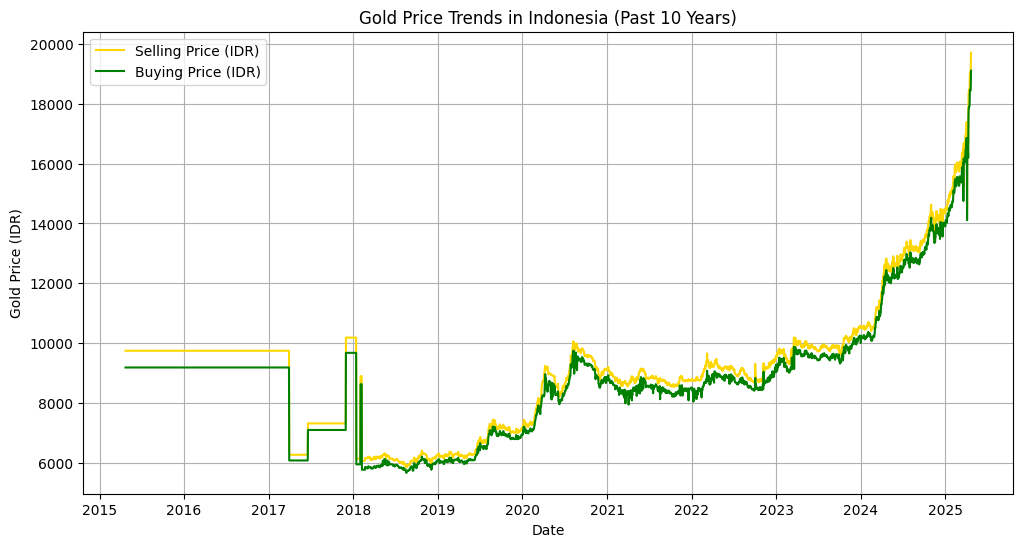

In [38]:
# Plot gold price trends
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sell"], label="Selling Price (IDR)", color="gold")
plt.plot(df["date"], df["buy"], label="Buying Price (IDR)", color="green")
plt.xlabel("Date")
plt.ylabel("Gold Price (IDR)")
plt.title("Gold Price Trends in Indonesia (Past 10 Years)")
plt.legend()
plt.grid(True)
plt.show()

## 3️⃣ Moving Averages for Trend Analysis

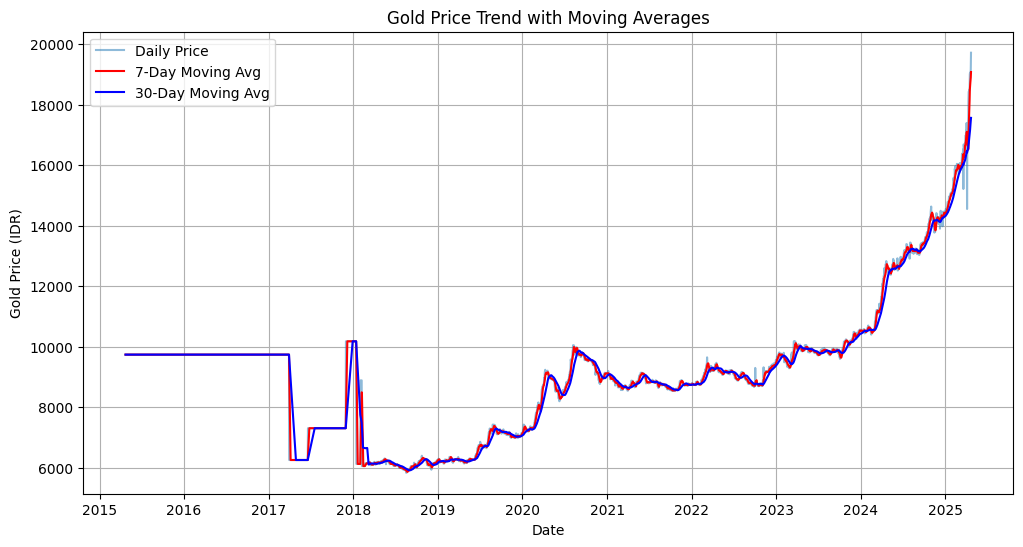

In [39]:
# Plot moving averages for trend analysis
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sell"], label="Daily Price", alpha=0.5)
plt.plot(df["date"], df["sell_ma7"], label="7-Day Moving Avg", color="red")
plt.plot(df["date"], df["sell_ma30"], label="30-Day Moving Avg", color="blue")
plt.xlabel("Date")
plt.ylabel("Gold Price (IDR)")
plt.title("Gold Price Trend with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

## 4️⃣ Volatility Analysis

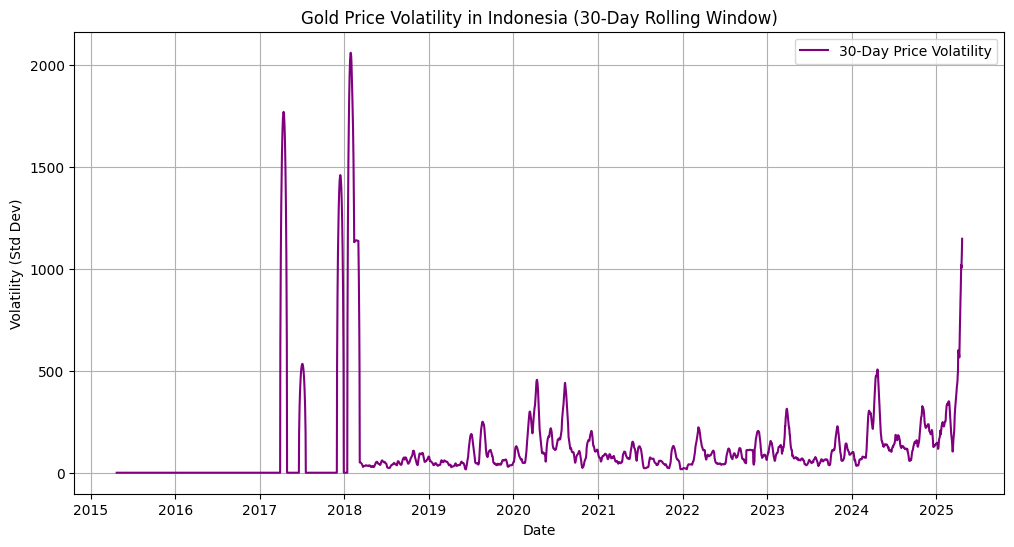

In [40]:
# Plot rolling standard deviation to analyze price volatility
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sell_volatility_30"], label="30-Day Price Volatility", color="purple")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.title("Gold Price Volatility in Indonesia (30-Day Rolling Window)")
plt.legend()
plt.grid(True)
plt.show()

## 5️⃣ Seasonal Analysis (Monthly Trends)

In [41]:
# Extract monthly averages for seasonal analysis
df["month"] = df["date"].dt.month
monthly_avg = df.groupby("month")["sell"].mean()

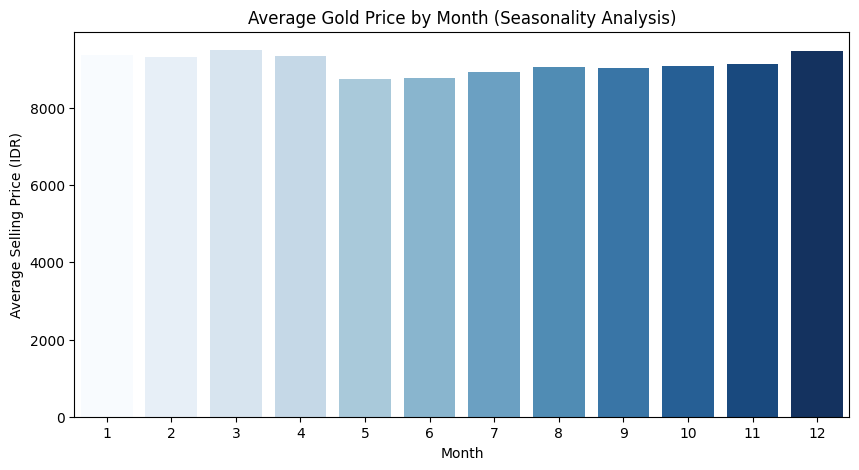

In [45]:
# Bar plot for seasonal trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.index, palette="Blues", dodge=False)
plt.xlabel("Month")
plt.ylabel("Average Selling Price (IDR)")
plt.title("Average Gold Price by Month (Seasonality Analysis)")
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

## 6️⃣ Correlation Analysis

In [46]:
# Compute correlation matrix
correlation_matrix = df.drop(columns=["date"]).corr()

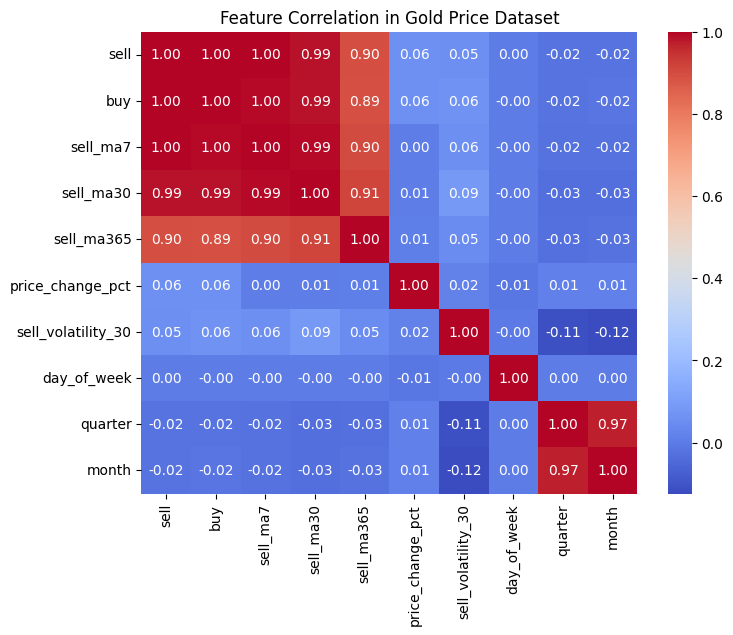

In [47]:
# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation in Gold Price Dataset")
plt.show()

- ✅ Strong correlations between sell, buy, and moving averages (sell_ma7, sell_ma30, sell_ma365).
- ✅ Price change percentage (price_change_pct) shows low correlation, which means sudden spikes or drops might not always follow predictable patterns.
- ✅ Day of the week, quarter, and month have minimal influence, suggesting seasonal effects might be weak.